In [87]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [88]:
# Read CSV
df = pd.read_csv("articles.csv")
df.head()

# output = nltk.pos_tag(text)
# print(output)

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Politics,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Politics,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Politics,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Politics,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Politics,1


In [89]:
stop = stopwords.words('english') 

In [90]:
# lowercase title
###title_token = word_tokenize(data['title'])
df['title'] = df['title'].apply(lambda x: x.lower())

#data['title'] = data['title'].apply(lambda x: ''.join (word for word in x.split() if word not in (stop)))

In [91]:
df['title_tokenized'] = df['title'].apply(word_tokenize)
df['title_tokenized'].head()

0    [donald, trump, sends, out, embarrassing, new,...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, an, internet...
3    [trump, is, so, obsessed, he, even, has, obama...
4    [pope, francis, just, called, out, donald, tru...
Name: title_tokenized, dtype: object

In [92]:
df['title_stopremoved'] = df['title_tokenized'].apply(lambda x: [item for item in x if item not in stop])
df['title_stopremoved'].head()

0    [donald, trump, sends, embarrassing, new, year...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, internet, jo...
3    [trump, obsessed, even, obama, ’, name, coded,...
4    [pope, francis, called, donald, trump, christm...
Name: title_stopremoved, dtype: object

In [126]:
title_wordcount = df['title_stopremoved'].apply(len)

<AxesSubplot:>

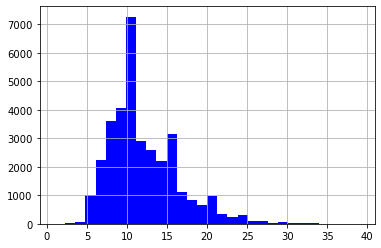

In [116]:
pd.Series(title_wordcount).hist(bins = 30,color='blue')

<AxesSubplot:>

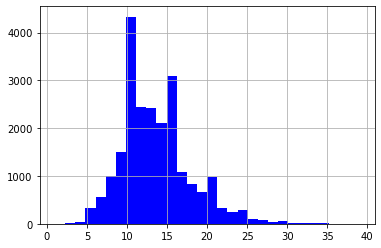

In [133]:
# Fake news titles

df2 = df.loc[df['label']==1]
fake_title_wordcount = df2['title_stopremoved'].apply(len)
pd.Series(fake_title_wordcount).hist(bins = 30,color='blue')

<AxesSubplot:>

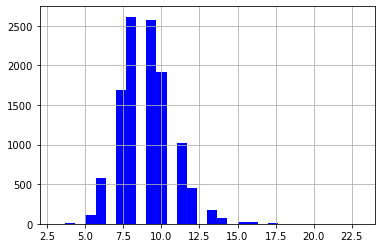

In [134]:
# True news titles

df3 = df.loc[df['label']==0]
true_title_wordcount = df3['title_stopremoved'].apply(len)
pd.Series(true_title_wordcount).hist(bins = 30,color='blue')

In [99]:
#title_tag = df['title_stopremoved'].to_numpy()
# from sklearn.feature_extraction.text import TfidfVectorizer 
 
# # settings that you use for count vectorizer will go here 
# tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# # just send in all your docs here 
# tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(title_tag)
# nltk.pos_tag(title_tag)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
# cv=CountVectorizer(max_features=1000)
# vect=cv.fit_transform(df['title_stopremoved'].toarray()
# vect

In [101]:
# Totenizing text
###title_token = word_tokenize(data['title'])
df['text_tokenized'] = df['text'].apply(word_tokenize)
df['text_tokenized'].head()

0    [donald, trump, just, couldn, t, wish, all, am...
1    [house, intelligence, committee, chairman, dev...
2    [on, friday, ,, it, was, revealed, that, forme...
3    [on, christmas, day, ,, donald, trump, announc...
4    [pope, francis, used, his, annual, christmas, ...
Name: text_tokenized, dtype: object

In [104]:
df['text_stopremoved'] = df['text_tokenized'].apply(lambda x: [item for item in x if item not in stop])
df['text_stopremoved'].head()

0    [donald, trump, wish, americans, happy, new, y...
1    [house, intelligence, committee, chairman, dev...
2    [friday, ,, revealed, former, milwaukee, sheri...
3    [christmas, day, ,, donald, trump, announced, ...
4    [pope, francis, used, annual, christmas, day, ...
Name: text_stopremoved, dtype: object

In [110]:
text_wordcount = df['text_stopremoved'].apply(len)

<AxesSubplot:>

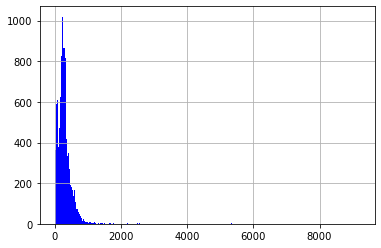

In [117]:
pd.Series(text_wordcount).hist(bins = 1000,color='blue')

<AxesSubplot:>

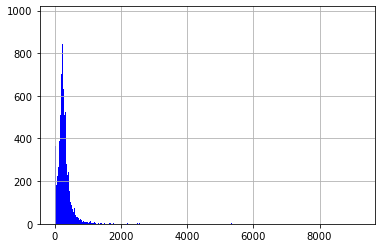

In [135]:
# Fake news text

df4 = df.loc[df['label']==1]
fake_text_wordcount = df4['text_stopremoved'].apply(len)
pd.Series(fake_text_wordcount).hist(bins = 1000,color='blue')

<AxesSubplot:>

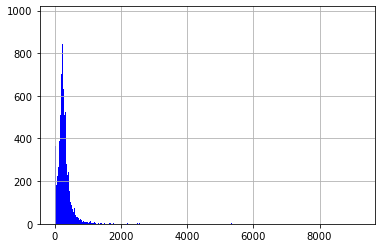

In [136]:
# True news text

df5 = df.loc[df['label']==1]
true_text_wordcount = df5['text_stopremoved'].apply(len)
pd.Series(true_text_wordcount).hist(bins = 1000,color='blue')